In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, GlobalMaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [2]:
df=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
columns=df.columns
columns

Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [4]:
df.drop([1,2,3,4],axis=1,inplace=True)
df.head()

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.columns=['sentiment','data']
df.head()

,sentiment,data
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
y=df['sentiment']

### Dividing into train test split

In [8]:
df_train,df_test,y_train,y_test=train_test_split(df['data'],y,test_size=0.33,random_state=42)
print('DF Train Shape: ',df_train.shape)
print('DF Test Shape: ',df_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)

DF Train Shape:  (1072000,)
DF Test Shape:  (528000,)
Y Train Shape:  (1072000,)
Y Test Shape:  (528000,)


### Building Deep learning model

In [9]:
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train=tokenizer.texts_to_sequences(df_train)
sequence_test=tokenizer.texts_to_sequences(df_test)

In [10]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 527470 number of independent tokens


In [11]:
data_train=pad_sequences(sequence_train)
data_train.shape

(1072000, 116)

In [12]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(528000, 116)

In [13]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 116)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 116, 20)        │    10,549,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 114, 32)        │         1,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 38, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 36, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 10, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,582,929 (40.37 MB)

 Trainable params: 10,582,929 (40.37 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)

Epoch 1/5
10720/10720 ━━━━━━━━━━━━━━━━━━━━ 1351s 125ms/step - accuracy: 0.7716 - loss: 0.4716 - val_accuracy: 0.8165 - val_loss: 0.4026
Epoch 2/5
10720/10720 ━━━━━━━━━━━━━━━━━━━━ 1283s 120ms/step - accuracy: 0.8255 - loss: 0.3870 - val_accuracy: 0.8211 - val_loss: 0.3954
Epoch 3/5
10720/10720 ━━━━━━━━━━━━━━━━━━━━ 1291s 120ms/step - accuracy: 0.8353 - loss: 0.3684 - val_accuracy: 0.8190 - val_loss: 0.3995
Epoch 4/5
10720/10720 ━━━━━━━━━━━━━━━━━━━━ 1299s 121ms/step - accuracy: 0.8438 - loss: 0.3536 - val_accuracy: 0.8194 - val_loss: 0.4004
Epoch 5/5
10720/10720 ━━━━━━━━━━━━━━━━━━━━ 1283s 120ms/step - accuracy: 0.8502 - loss: 0.3417 - val_accuracy: 0.8197 - val_loss: 0.4030


In [15]:
y_pred=model.predict(data_test)
y_pred

16500/16500 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step


array([[7.2670031e-01, 6.4378597e-10, 8.2703489e-10, 1.2175178e-09,
        2.7329972e-01],
       [6.4817536e-01, 3.0532516e-15, 3.7880368e-15, 5.1911007e-15,
        3.5182461e-01],
       [3.5045752e-01, 2.0506551e-16, 2.6592880e-16, 1.6186351e-16,
        6.4954251e-01],
       ...,
       [1.6236350e-02, 6.3375278e-22, 7.6696076e-22, 2.0713382e-22,
        9.8376369e-01],
       [8.7265164e-01, 1.2235786e-28, 1.6082040e-28, 2.7070168e-28,
        1.2734839e-01],
       [9.0995669e-01, 1.7776745e-19, 1.9307741e-19, 3.7396241e-19,
        9.0043239e-02]], dtype=float32)

In [16]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 0, 4, ..., 4, 0, 0], dtype=int64)

### Scoring

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


Text(50.722222222222214, 0.5, 'y_pred')

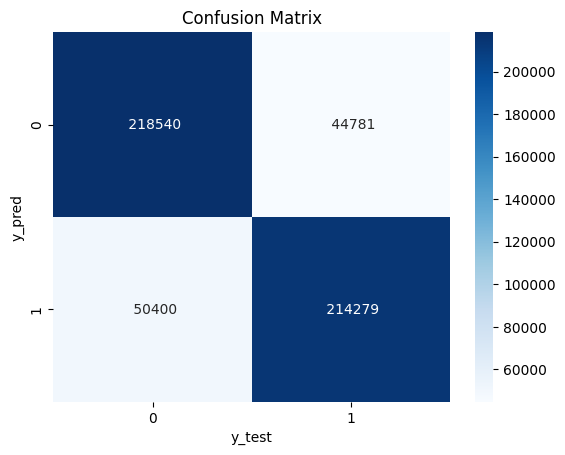

In [19]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82    263321
           4       0.83      0.81      0.82    264679

    accuracy                           0.82    528000
   macro avg       0.82      0.82      0.82    528000
weighted avg       0.82      0.82      0.82    528000

